<a href="https://colab.research.google.com/github/Sherma-ThangamS/Zeotap_Assignment/blob/main/Sherma_SelvaKumar_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Customers.csv:
# https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing
# Products.csv :
# https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing
# Transactions.csv :
# https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing

In [41]:
import pandas as pd


!wget https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE -O Customers.csv
!wget https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF -O Transactions.csv


# Load the data into pandas DataFrames
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Head
print("Customers DataFrame:")
print(customers.head())


print("\nTransactions DataFrame:")
print(transactions.head())

--2025-01-27 14:41:29--  https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
Resolving drive.google.com (drive.google.com)... 172.217.7.46, 2607:f8b0:4025:811::200e
Connecting to drive.google.com (drive.google.com)|172.217.7.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE [following]
--2025-01-27 14:41:29--  https://drive.usercontent.google.com/download?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:802::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8542 (8.3K) [application/octet-stream]
Saving to: ‘Customers.csv’

Customers.csv       100%[===================>]   8.34K  --.-KB/s    in 0s      

2025-01-27 14:41:32 (54.4 MB/s) - ‘Customers.csv

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Merge DataFrames
merged_df = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [44]:
# Feature Engineering (example features, adjust as needed)
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['DaysSinceSignup'] = (merged_df['TransactionDate'] - merged_df['SignupDate']).dt.days
merged_df['TotalValue'] = merged_df['Quantity']*merged_df['Price']

In [45]:
# Select features for clustering
features = ['TotalValue', 'Quantity', 'Price', 'DaysSinceSignup']
X = merged_df[features]


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Find optimal number of clusters using Davies-Bouldin Index
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

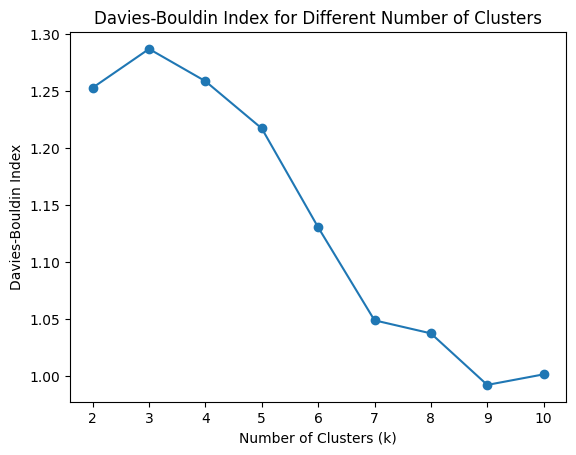

In [47]:
# Plot the DB Index scores
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

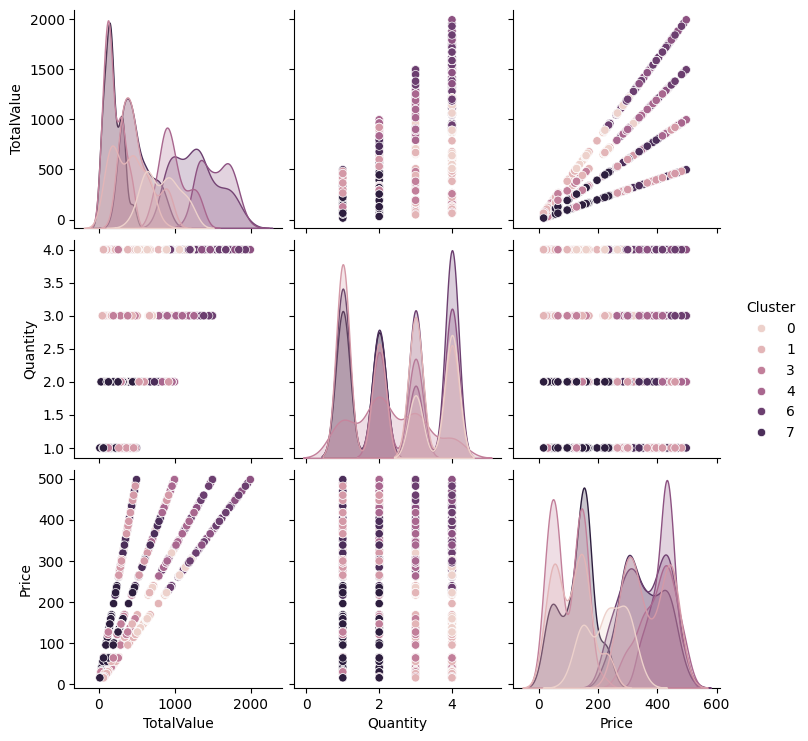

In [48]:
# Choose k based on the DB index plot
optimal_k = 9

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizations
# Pairplot
sns.pairplot(merged_df, hue='Cluster', vars=features[:3])
plt.show()


In [49]:
# Cluster characteristics
print(merged_df.groupby('Cluster')[features].mean())


# Calculate and print the DB Index for the chosen k
db_index = davies_bouldin_score(X_scaled, merged_df['Cluster'])
print(f"Davies-Bouldin Index for k={optimal_k}: {db_index}")

          TotalValue  Quantity       Price  DaysSinceSignup
Cluster                                                    
0         833.432000  3.662500  231.542875       698.062500
1         377.386759  3.444444  111.060926       102.462963
2         503.762419  1.370968  368.165242        45.129032
3         198.421280  2.280000   94.929520       689.056000
4         984.509121  2.483516  402.663956       426.725275
5        1535.919457  3.673913  420.103261       650.728261
6        1278.000634  3.584507  358.934577        -6.570423
7         500.556667  1.430894  354.265285       691.146341
8         185.691739  1.460870  127.670609        74.843478
Davies-Bouldin Index for k=9: 0.9925398039282872


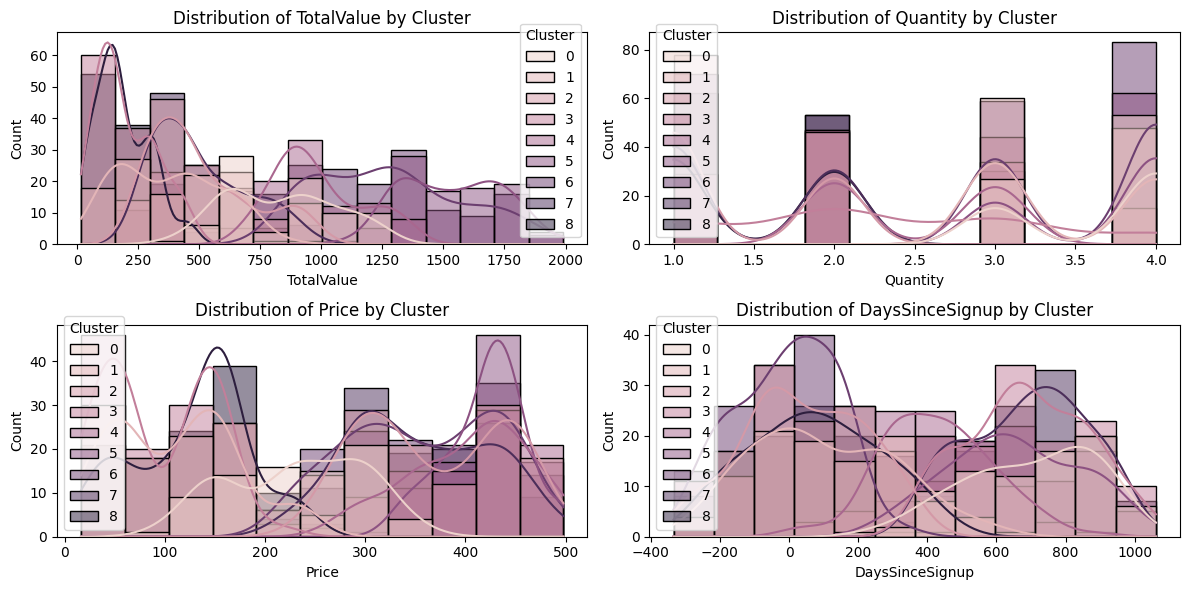

          TotalValue                        Quantity                   \
                mean    median         std      mean median       std   
Cluster                                                                 
0         833.432000   868.200  223.832619  3.662500    4.0  0.475840   
1         377.386759   373.360  206.109336  3.444444    3.0  0.499221   
2         503.762419   447.230  204.189862  1.370968    1.0  0.485024   
3         198.421280   164.720  119.483049  2.280000    2.0  0.955460   
4         984.509121   939.540  180.731692  2.483516    2.0  0.502497   
5        1535.919457  1529.620  200.655483  3.673913    4.0  0.471348   
6        1278.000634  1264.735  293.514995  3.584507    4.0  0.494551   
7         500.556667   452.420  186.899625  1.430894    1.0  0.497227   
8         185.691739   158.930  108.512260  1.460870    1.0  0.500648   

              Price                    DaysSinceSignup                     
               mean  median        std         

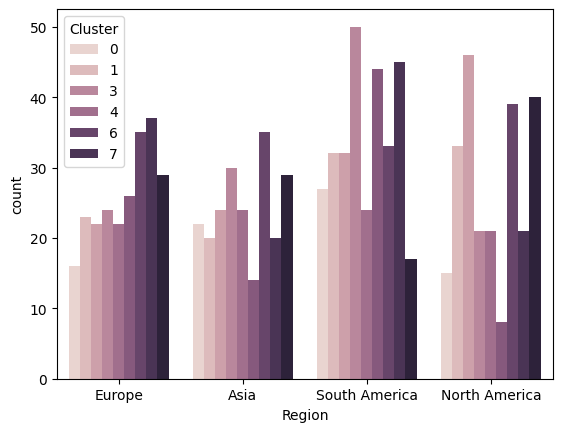

Silhouette Score: 0.2884856806588719


In [53]:
# Visualize cluster distributions for key features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_df, x=feature, hue='Cluster', kde=True)
    plt.title(f'Distribution of {feature} by Cluster')
plt.tight_layout()
plt.show()


# Analyze cluster characteristics in more detail
cluster_characteristics = merged_df.groupby('Cluster').agg({
    'TotalValue': ['mean', 'median', 'std'],
    'Quantity': ['mean', 'median', 'std'],
    'Price': ['mean', 'median', 'std'],
    'DaysSinceSignup': ['mean', 'median', 'std']
})
print(cluster_characteristics)

# Further analysis:  Explore relationships between clusters and other variables (e.g., customer demographics, product categories) if available.
# Example: if you have a 'City' column
sns.countplot(x='Region', hue='Cluster', data=merged_df)
plt.show()


# Silhouette analysis
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, merged_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")